In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df_all = pd.read_csv('../reports/windows/results.csv')
df_all['num_samples'] = pd.Categorical(df_all['num_samples'], ['28k', '56k', '113k', 'all'])

## Evaluate ensemble performance

In [21]:
all_w = df_all[df_all['num_samples'] == 'all']

In [22]:
def get_experiment(num_samples):
    return df_all[(df_all['num_samples'] == num_samples)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

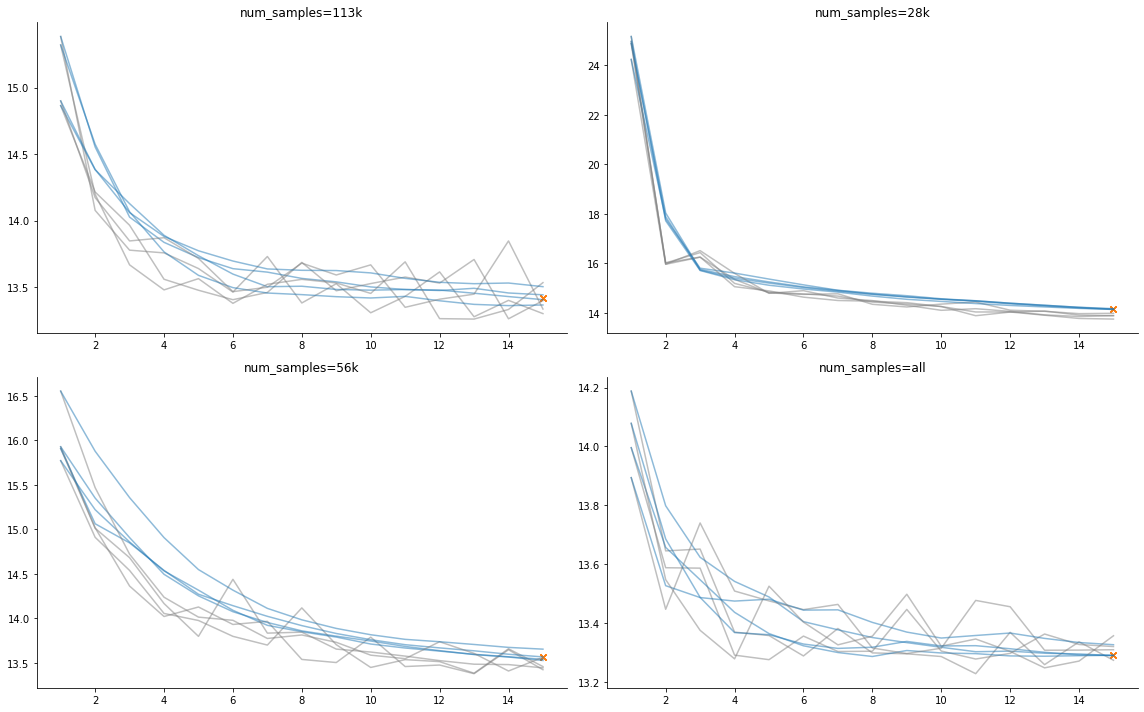

In [23]:
plt.figure(figsize=(16, 10))

for i, num_samples in enumerate(df_all['num_samples'].unique()):
    ax = plt.subplot(2, 2, i+1)
    ex = get_experiment(num_samples)
    title = 'num_samples={}'.format(num_samples)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

## Experiment comparison

In [24]:
df = df_all[(df_all['ensemble']) & ((df_all['epoch'].isna()) | (df_all['epoch'] == 14))]

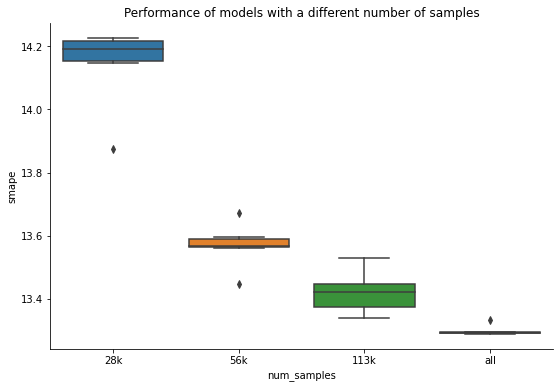

In [25]:
plt.figure(figsize=(9, 6))
ax = sns.boxplot(x='num_samples', y='smape', data=df)

ax.set_title('Performance of models with a different number of samples')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [26]:
df[(df['epoch'].isna())].sort_values('num_samples')[['num_samples', 'smape']]

,num_samples,smape
271,28k,14.145879
407,56k,13.562106
135,113k,13.418041
543,all,13.292263
